In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

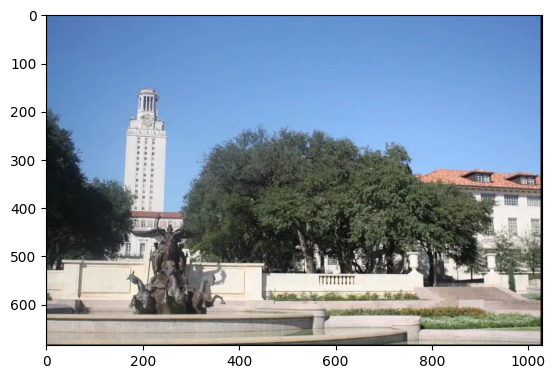

In [53]:
img1 = cv2.imread("left.png")
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

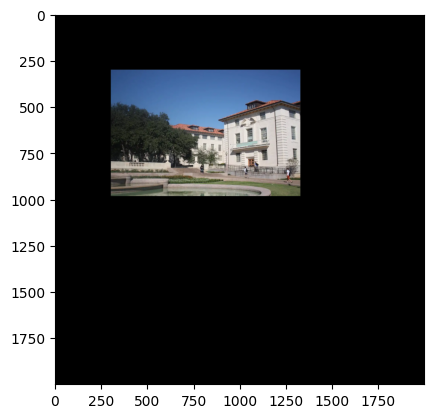

In [26]:
img2 = cv2.imread("right.png")
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)
shift = np.array([[1 , 0 , 300],
                 [0 , 1 , 300],
                 [0 , 0 , 1] ] , dtype=np.float32)
img2 = cv2.warpPerspective(img2 , shift , (2000 , 2000))
plt.imshow(img2)

In [27]:
sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L1 , crossCheck = False)

In [28]:
kp1 , des1 = sift.detectAndCompute(img1 , None)
kp2 , des2 = sift.detectAndCompute(img2 , None)

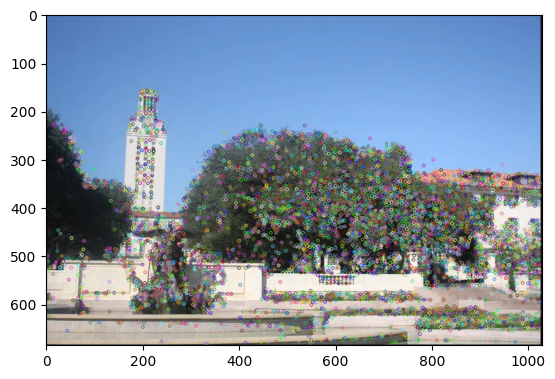

In [36]:
img1kp = cv2.drawKeypoints(img1 , kp1 , None)
plt.imshow(img1kp)

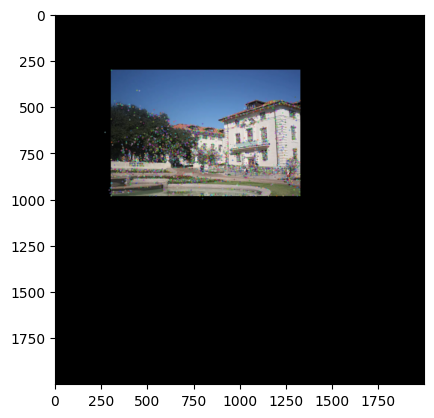

In [31]:
img2kp = cv2.drawKeypoints(img2 , kp2 , None)
plt.imshow(img2kp)

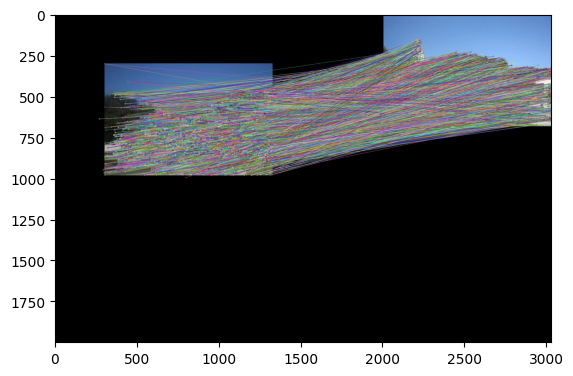

In [37]:
rawMatching = bf.knnMatch(des2 , des1 , k=2)
plt.imshow(cv2.drawMatchesKnn(img2 , kp2 , img1 , kp1 , rawMatching , None))

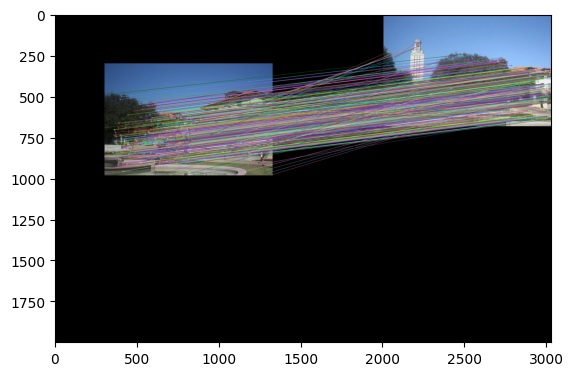

In [38]:
def GenrateGoodKeyPoints(rawMatches):
    goodKeypoints = []
    goodMatches = []
    for m1 , m2 in rawMatches:
        if m1.distance < 0.8 * m2.distance:
            goodMatches.append([m1])
            goodKeypoints.append((m1.trainIdx , m1.queryIdx))
    return goodMatches , goodKeypoints
        
matches , keypoints = GenrateGoodKeyPoints(rawMatching)

plt.imshow(cv2.drawMatchesKnn(img2 , kp2 , img1 , kp1 , matches , None , flags=2))

compute homography

In [43]:
img2kp = np.array([kp2[i].pt for (_, i) in keypoints])
img1kp = np.array([kp1[i].pt for (i , _) in keypoints])
H , _ = cv2.findHomography(np.float32(img1kp) , np.float32(img2kp) , cv2.RANSAC , 5.0)
H

array([[ 1.38330474e+00, -6.70999693e-02, -2.74613851e+02],
       [ 2.53715838e-01,  1.22738918e+00,  1.31298842e+02],
       [ 2.79475751e-04,  2.18627770e-05,  1.00000000e+00]])

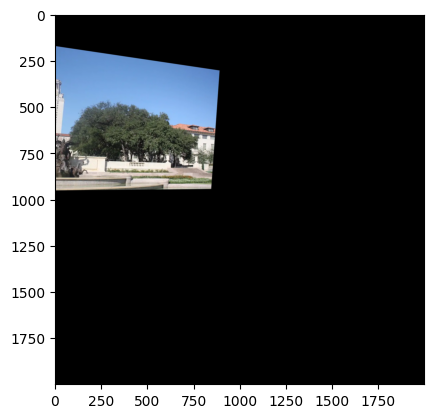

In [50]:
img1Transformed = cv2.warpPerspective(img1 , H, (img2.shape[1] , img2.shape[0]))
plt.imshow(img1Transformed)

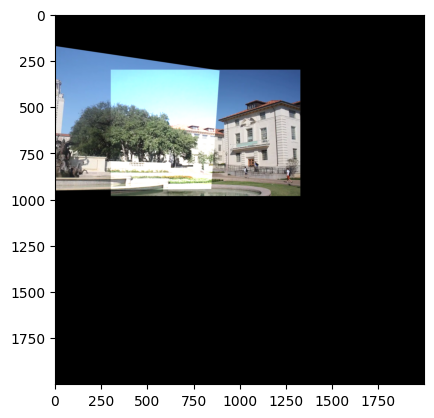

In [51]:
plt.imshow(cv2.add(img1Transformed , img2))